In [34]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [35]:
#starting url for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [36]:
#create a set of random latitutde and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [37]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [38]:
#use the tuple() funciton to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
            citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cidreira br
jamestown sh
tsihombe mg
gillette us
inta ru
atuona pf
vaini to
pevek ru
taolanaro mg
tuktoyaktuk ca
punta arenas cl
salinopolis br
cape town za
palora ec
barra do garcas br
albany au
tasiilaq gl
georgetown sh
bredasdorp za
vaini to
punta arenas cl
bredasdorp za
hithadhoo mv
vaini to
punta arenas cl
pacific grove us
taolanaro mg
hermanus za
aksarka ru
ushuaia ar
hithadhoo mv
cayenne gf
giyani za
ginir et
kapaa us
punta arenas cl
rikitea pf
vostok ru
dikson ru
vaini to
hobart au
iqaluit ca
lang son vn
albany au
geraldton au
busselton au
rocha uy
rolim de moura br
hilo us
chingirlau kz
tonj sd
mataura pf
laguna br
albany au
mataura pf
ponta do sol cv
korla cn
punta arenas cl
barrow us
bow island ca
rikitea pf
albany au
jamestown sh
sioux lookout ca
hermanus za
hithadhoo mv
barrow us
upernavik gl
hobart au
yellowknife ca
hermanus za
salta ar
lavrentiya ru
bograd ru
hamilton bm
isangel vu
hermanus za
luderitz na
carnarvon au
yanam in
kapaa us
atuona pf
qaanaaq gl
rikitea pf
rik

bluff nz
linjiang cn
rikitea pf
taolanaro mg
yellowknife ca
bredasdorp za
ushuaia ar
taolanaro mg
kapaa us
easton us
progreso mx
hobart au
taolanaro mg
khatanga ru
jamestown sh
vila velha br
atuona pf
scottsburgh za
dikson ru
mar del plata ar
bluff nz
vermillion us
mataura pf
provideniya ru
saint-philippe re
cape town za
taolanaro mg
havre de grace us
grand centre ca
dzhebariki-khaya ru
albany au
taolanaro mg
southbridge nz
iqaluit ca
leningradskiy ru
tuatapere nz
hvolsvollur is
lenine ua
arlit ne
luderitz na
naze jp
aklavik ca
sentyabrskiy ru
qaanaaq gl
bengkulu id
mataura pf
rikitea pf
etampes fr
atuona pf
nanortalik gl
lolua tv
ponta do sol cv
doctor pedro p. pena py
attawapiskat ca
willmar us
arraial do cabo br
manta ec
ushuaia ar
port elizabeth za
cape town za
mataura pf
albany au
lorengau pg
albany au
busselton au
busselton au
bredasdorp za
aklavik ca
esso ru
barra da estiva br
talakan ru
vaini to
hermanus za
ribeira grande pt
taolanaro mg
wanning cn
port alfred za
bambous virieu

straseni md
port alfred za
manokwari id
salalah om
guerrero negro mx
flinders au
utiroa ki
sao filipe cv
bayir jo
ushuaia ar
tvoroyri fo
fortuna us
alice springs au
tessalit ml
kwinana au
qaanaaq gl
nyurba ru
khour in
kharod in
bonthe sl
maniitsoq gl
rikitea pf
upernavik gl
tinaquillo ve
amderma ru
hilo us
tromso no
ribeira grande pt
hermanus za
bathsheba bb
assomada cv
alice springs au
taolanaro mg
rikitea pf
rikitea pf
rorvik no
taolanaro mg
bajo baudo co
hilo us
vanimo pg
viedma ar
zhigansk ru
atuona pf
rikitea pf
barentsburg sj
rikitea pf
cayenne gf
ushuaia ar
klaksvik fo
okha ru
cherskiy ru
taolanaro mg
tiksi ru
albany au
hazorasp uz
nikolskoye ru
taolanaro mg
tsihombe mg
georgetown sh
yatou cn
ushuaia ar
geraldton au
hithadhoo mv
sentyabrskiy ru
nurota uz
dikson ru
mataura pf
cape town za
georgetown sh
vaitupu wf
hilo us
santiago de cao pe
nemuro jp
hithadhoo mv
albany au
hilo us
ushuaia ar
barranca pe
belushya guba ru
chuy uy
atuona pf
ushuaia ar
sturgeon falls ca
yarada in
hith

In [39]:
#create a list for holding the cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

597

In [40]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city 
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
    
#run an api request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        #append the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1 | cidreira
Processing Record 2 of set 1 | jamestown
Processing Record 3 of set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of set 1 | gillette
Processing Record 5 of set 1 | inta
Processing Record 6 of set 1 | atuona
Processing Record 7 of set 1 | vaini
Processing Record 8 of set 1 | pevek
Processing Record 9 of set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of set 1 | tuktoyaktuk
Processing Record 11 of set 1 | punta arenas
Processing Record 12 of set 1 | salinopolis
Processing Record 13 of set 1 | cape town
Processing Record 14 of set 1 | palora
Processing Record 15 of set 1 | barra do garcas
Processing Record 16 of set 1 | albany
Processing Record 17 of set 1 | tasiilaq
Processing Record 18 of set 1 | georgetown
Processing Record 19 of set 1 | bredasdorp
Processing Record 20 of set 1 | hithadhoo
Processing Record 21 of set 1 | pacific grove
Processing Record 22

City not found. Skipping...
Processing Record 37 of set 4 | akyab
Processing Record 38 of set 4 | san pedro
Processing Record 39 of set 4 | moctezuma
Processing Record 40 of set 4 | lolua
City not found. Skipping...
Processing Record 41 of set 4 | mahibadhoo
Processing Record 42 of set 4 | olafsvik
Processing Record 43 of set 4 | bathsheba
Processing Record 44 of set 4 | selaphum
Processing Record 45 of set 4 | ilhabela
Processing Record 46 of set 4 | mbanza-ngungu
Processing Record 47 of set 4 | nelson bay
Processing Record 48 of set 4 | burkburnett
Processing Record 49 of set 4 | provideniya
Processing Record 50 of set 4 | tiksi
Processing Record 1 of set 5 | mbandaka
Processing Record 2 of set 5 | grand-santi
Processing Record 3 of set 5 | puerto escondido
Processing Record 4 of set 5 | presidencia roque saenz pena
Processing Record 5 of set 5 | kodiak
Processing Record 6 of set 5 | nukus
Processing Record 7 of set 5 | kiunga
Processing Record 8 of set 5 | palmer
Processing Record 9

Processing Record 26 of set 8 | kalabo
Processing Record 27 of set 8 | challapata
Processing Record 28 of set 8 | fortuna
Processing Record 29 of set 8 | beyneu
Processing Record 30 of set 8 | datong
Processing Record 31 of set 8 | nantucket
Processing Record 32 of set 8 | nouakchott
Processing Record 33 of set 8 | maceio
Processing Record 34 of set 8 | igrim
Processing Record 35 of set 8 | mindelo
Processing Record 36 of set 8 | barcelona
Processing Record 37 of set 8 | hargeysa
Processing Record 38 of set 8 | namibe
Processing Record 39 of set 8 | moroni
Processing Record 40 of set 8 | bahar
Processing Record 41 of set 8 | mount gambier
Processing Record 42 of set 8 | taltal
Processing Record 43 of set 8 | abu dhabi
Processing Record 44 of set 8 | san quintin
Processing Record 45 of set 8 | san jose
Processing Record 46 of set 8 | pijijiapan
Processing Record 47 of set 8 | charyshskoye
Processing Record 48 of set 8 | macaboboni
City not found. Skipping...
Processing Record 49 of set 

Processing Record 10 of set 12 | safford
Processing Record 11 of set 12 | nizhniy kuranakh
Processing Record 12 of set 12 | san fernando
Processing Record 13 of set 12 | oranjemund
Processing Record 14 of set 12 | hornepayne
Processing Record 15 of set 12 | padang
Processing Record 16 of set 12 | mehamn
Processing Record 17 of set 12 | xining
Processing Record 18 of set 12 | hearst
Processing Record 19 of set 12 | dalby
Processing Record 20 of set 12 | takhtamygda
Processing Record 21 of set 12 | katy
Processing Record 22 of set 12 | araguaina
Processing Record 23 of set 12 | rovaniemi
Processing Record 24 of set 12 | quchan
Processing Record 25 of set 12 | asau
Processing Record 26 of set 12 | straseni
Processing Record 27 of set 12 | manokwari
Processing Record 28 of set 12 | flinders
Processing Record 29 of set 12 | tvoroyri
Processing Record 30 of set 12 | kwinana
Processing Record 31 of set 12 | khour
City not found. Skipping...
Processing Record 32 of set 12 | kharod
Processing R

In [42]:
#convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,2022-04-14 09:16:56,-30.1811,-50.2056,65.08,67,100,12.88
1,Jamestown,US,2022-04-14 09:16:56,42.0970,-79.2353,61.72,64,75,4.61
2,Gillette,US,2022-04-14 09:16:57,44.2911,-105.5022,12.02,82,100,11.50
3,Inta,RU,2022-04-14 09:16:57,66.0317,60.1659,36.39,100,100,7.65
4,Atuona,PF,2022-04-14 09:16:57,-9.8000,-139.0333,78.82,79,31,16.06
5,Vaini,TO,2022-04-14 09:16:58,-21.2000,-175.2000,78.96,94,20,8.05
6,Pevek,RU,2022-04-14 09:16:58,69.7008,170.3133,7.83,90,100,3.83
7,Tuktoyaktuk,CA,2022-04-14 09:16:58,69.4541,-133.0374,-16.37,100,94,5.88
8,Punta Arenas,CL,2022-04-14 09:14:19,-53.1500,-70.9167,50.11,66,20,20.71
9,Salinopolis,BR,2022-04-14 09:16:59,-0.6136,-47.3561,78.40,88,100,8.99


In [44]:
#create the output file (csv)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
#extract relevant fields from the DataFrame for plotting
lts=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

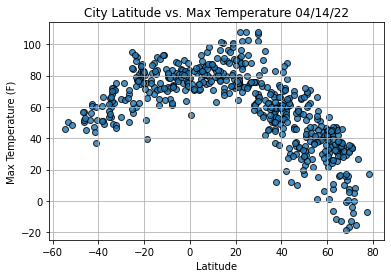

In [51]:
#get today's date in seconds
today=time.time()

#build the scatter plot for latitude vs max temperature
plt.scatter(lts, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()
    

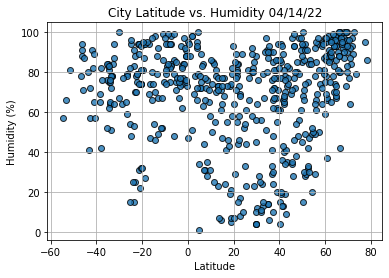

In [53]:
#build the scatter plots for latitude vs humidity
plt.scatter(lts, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " +time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

plt.show()

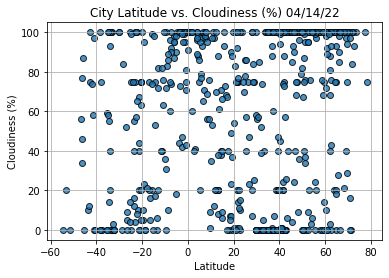

In [54]:
#build the scatter plots for latitude vs. cloudiness
plt.scatter(lts, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

plt.show()

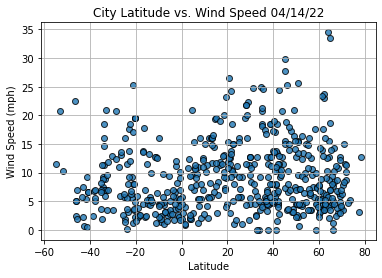

In [55]:
#build the scatter plots for latitude vs wind speed
plt.scatter(lts, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

plt.show()